In [213]:
import pandas as pd
import numpy as np
from xgboost import cv
import matplotlib.pyplot as plt
import sklearn
import xgboost
from sklearn.linear_model import LinearRegression, Ridge,LogisticRegression
from sklearn.model_selection import train_test_split

In [214]:
df=pd.read_csv('US_Accidents_Dec20_updated.csv')

In [215]:
df

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2716600,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2716601,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-2716602,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-2716603,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10148,-84.52341,39.09841,-84.52241,0.219,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
4,A-2716604,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.06213,-81.53784,41.06217,-81.53547,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516059,A-4239402,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.00248,-117.37936,33.99888,-117.37094,0.543,At Market St - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
1516060,A-4239403,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.76696,-117.14806,32.76555,-117.15363,0.338,At Camino Del Rio/Mission Center Rd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
1516061,A-4239404,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.77545,-117.84779,33.77740,-117.85727,0.561,At Glassell St/Grand Ave - Accident. in the ri...,...,False,False,False,False,False,False,Day,Day,Day,Day
1516062,A-4239405,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.99246,-118.40302,33.98311,-118.39565,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


drop columns where one category dominates
which colums to drop in categorical?( city state county looks skewed).Definitley drop colums withnjust one category


Covert the timestamp to a common time.
Fill missing values



In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516064 entries, 0 to 1516063
Data columns (total 47 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   ID                     1516064 non-null  object 
 1   Severity               1516064 non-null  int64  
 2   Start_Time             1516064 non-null  object 
 3   End_Time               1516064 non-null  object 
 4   Start_Lat              1516064 non-null  float64
 5   Start_Lng              1516064 non-null  float64
 6   End_Lat                1516064 non-null  float64
 7   End_Lng                1516064 non-null  float64
 8   Distance(mi)           1516064 non-null  float64
 9   Description            1516064 non-null  object 
 10  Number                 469969 non-null   float64
 11  Street                 1516064 non-null  object 
 12  Side                   1516064 non-null  object 
 13  City                   1515981 non-null  object 
 14  County            

In [217]:
ac=df['Give_Way'].value_counts()
#at=df['Astronomical_Twilight'].value_counts()
ac

False    1512809
True        3255
Name: Give_Way, dtype: int64

In [218]:
100*3255/sum(ac)

0.21470069865124428

In [219]:
df['City'].value_counts()

Los Angeles         39984
Miami               36233
Charlotte           22203
Houston             20843
Dallas              19497
                    ...  
Five Points             1
North Washington        1
Schroeder               1
Pall Mall               1
Closter                 1
Name: City, Length: 10657, dtype: int64

In [220]:
st=df['State'].value_counts()

In [221]:
st

CA    448833
FL    153007
OR     87484
TX     75142
NY     60974
MN     52345
VA     51198
NC     50159
PA     42844
IL     41709
MD     35320
UT     33218
GA     31111
AZ     30185
NJ     29850
SC     28090
MI     27775
WA     22999
OH     22044
TN     21874
CO     19809
LA     19250
MO     16949
CT     15194
IN     11736
AL      9375
WI      7919
MA      6121
KY      5671
OK      5592
KS      5146
IA      4780
AR      4373
ID      4061
NH      3826
DC      3788
RI      3766
NV      3681
MT      3306
WV      3242
MS      2790
DE      2331
ME      2202
NE      2178
NM      1467
ND       455
VT       352
WY       330
SD       213
Name: State, dtype: int64

In [222]:
213/sum(st)

0.00014049538805749624

Getting all the categorical columns

In [223]:
cat_col=df.select_dtypes(['object','bool']).columns


In [224]:
cat_col

Index(['ID', 'Start_Time', 'End_Time', 'Description', 'Street', 'Side', 'City',
       'County', 'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code',
       'Weather_Timestamp', 'Wind_Direction', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

ID is irreleveant so removing it from list of categorical columns. Start time and end time is also removed because
they are going to be treated as time

In [225]:
cat_col=cat_col[4:]

In [226]:
cat_col

Index(['Street', 'Side', 'City', 'County', 'State', 'Zipcode', 'Country',
       'Timezone', 'Airport_Code', 'Weather_Timestamp', 'Wind_Direction',
       'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset',
       'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight'],
      dtype='object')

Filtering the categorical columsn and selecting only those columns thst have total number of classes between
2 and 50.

In [227]:
cat_col_selected=[]
for i in cat_col:
    x=df[i].value_counts()
    if(len(x)>=2 and len(x)<50 and i!='Wind_Direction'):
        cat_col_selected.append(i)
        
        

In [228]:
cat_col_selected

['Side',
 'State',
 'Timezone',
 'Amenity',
 'Bump',
 'Crossing',
 'Give_Way',
 'Junction',
 'No_Exit',
 'Railway',
 'Roundabout',
 'Station',
 'Stop',
 'Traffic_Calming',
 'Traffic_Signal',
 'Sunrise_Sunset',
 'Civil_Twilight',
 'Nautical_Twilight',
 'Astronomical_Twilight']

In [229]:
#Is weather cobdition useful?  Wind_direction has to be preprocessed before encoding
# so cat_col_selected with Wind_direction should be categorical( city, county or state required?)

In [230]:
#Covert time stamps to proper time using timezone column


In [231]:
df['Timezone'].value_counts()

US/Eastern     587961
US/Pacific     564358
US/Central     265204
US/Mountain     96239
Name: Timezone, dtype: int64

filling the missing values in time zone attribute with the most occuring one.

In [232]:
def most_occur(x):
    if(x.name in ['Timezone']):
        return x.fillna(x.value_counts().index[0])
    else:
        return x

df=df.apply(most_occur)


Preprocessing step for timezone attribute: US/Eastern is converted into E ; US/Pacific into P and so on. This is done dynamically

In [233]:
def preprocess_timezone(x):
    ans=x.split('/')[1][0]
    #print('here')
    return ans

df['Timezone']=df['Timezone'].apply(preprocess_timezone)


    

In [234]:
#test='US/Eastern'
#test.split('/')[1][0]

In [235]:
df['Timezone']

0          E
1          E
2          E
3          E
4          E
          ..
1516059    P
1516060    P
1516061    P
1516062    P
1516063    P
Name: Timezone, Length: 1516064, dtype: object

In [236]:
#df['Start_Time']

In [237]:
#test='2016-02-08 00:37:08'
#date=test.split(' ')[0]
#time=test.split(' ')[1]
#date.split('-')
from datetime import datetime,timedelta

dt=datetime.fromisoformat('2016-02-08')
type(dt.weekday())

int

Preproces the start_time and end_time attributes. Splittig the start time into start_day and start_month. Start_month is month. Start_day is the day of the week.(0-Sunday, 1-Monday and so on). Same preprocessing step applied to end_time as well

In [238]:
#from datetime import datetime,timedelta

def date_from_timestamp(x):
    dt=x.split(' ')[0]
    DT=datetime.fromisoformat(dt)
    return [ int(dt.split('-')[1]),DT.weekday() ]

start_date=df['Start_Time'].apply(date_from_timestamp)
df['start_month']=list(zip(*start_date))[0]
df['start_day']=list(zip(*start_date))[1]


In [239]:
df['start_month']

0          2
1          2
2          2
3          2
4          2
          ..
1516059    8
1516060    8
1516061    8
1516062    8
1516063    8
Name: start_month, Length: 1516064, dtype: int64

In [240]:
#df['start_day'][0:40]

In [241]:
end_date=df['End_Time'].apply(date_from_timestamp)
df['end_month']=list(zip(*end_date))[0]
df['end_day']=list(zip(*end_date))[1]

In [242]:
df['end_month']

0          2
1          2
2          2
3          2
4          2
          ..
1516059    8
1516060    8
1516061    8
1516062    8
1516063    8
Name: end_month, Length: 1516064, dtype: int64

In [243]:
df['Start_Time']

0          2016-02-08 00:37:08
1          2016-02-08 05:56:20
2          2016-02-08 06:15:39
3          2016-02-08 06:15:39
4          2016-02-08 06:51:45
                  ...         
1516059    2019-08-23 18:03:25
1516060    2019-08-23 19:11:30
1516061    2019-08-23 19:00:21
1516062    2019-08-23 19:00:21
1516063    2019-08-23 18:52:06
Name: Start_Time, Length: 1516064, dtype: object

In [244]:
from datetime import datetime,timedelta

In [245]:
dt=datetime.fromisoformat('2016-02-08')
dt.weekday()

0

In [246]:
#te='2016-02-08 00:37:08'
#dt=datetime.fromisoformat(te)

In [247]:
df['Start_Time']

0          2016-02-08 00:37:08
1          2016-02-08 05:56:20
2          2016-02-08 06:15:39
3          2016-02-08 06:15:39
4          2016-02-08 06:51:45
                  ...         
1516059    2019-08-23 18:03:25
1516060    2019-08-23 19:11:30
1516061    2019-08-23 19:00:21
1516062    2019-08-23 19:00:21
1516063    2019-08-23 18:52:06
Name: Start_Time, Length: 1516064, dtype: object

In [248]:
dt=datetime.fromisoformat('2016-02-14')

Considering the hours part of the time

In [249]:
def conv_time(x):
    tm=x.split(' ')[1]
    #tm=tm[0:19]
    return int(tm.split(':')[0])

df['start_hours']=df['Start_Time'].apply(conv_time)
df['end_hours']=df['End_Time'].apply(conv_time)


In [250]:
df['start_hours']

0           0
1           5
2           6
3           6
4           6
           ..
1516059    18
1516060    19
1516061    19
1516062    19
1516063    18
Name: start_hours, Length: 1516064, dtype: int64

In [251]:
#df['Start_Time'][0][0:19]

Selecting all continuous attribiutes of the dataset

In [252]:
cont_cols=list(df.select_dtypes(['int64','float64']).columns)
#cont_cols=cont_cols+['start_hours','end_hours']
cont_cols.remove('Number')


In [253]:
cont_cols

['Severity',
 'Start_Lat',
 'Start_Lng',
 'End_Lat',
 'End_Lng',
 'Distance(mi)',
 'Temperature(F)',
 'Wind_Chill(F)',
 'Humidity(%)',
 'Pressure(in)',
 'Visibility(mi)',
 'Wind_Speed(mph)',
 'Precipitation(in)',
 'start_month',
 'start_day',
 'end_month',
 'end_day',
 'start_hours',
 'end_hours']

Filling the missing values with mean of that attribute

In [254]:
#nan_cols=df[cont_cols].isna().any()
#cols_nan=df.columns[nan_cols].tolist()

def fill_avg(x):
    if(x.name in cont_cols):
        return x.fillna(x.mean())
    else:
        return x

In [255]:
df1=df.apply(fill_avg)

In [256]:
COLS=cont_cols+cat_col_selected
df1=df1[COLS]

In case of categorical attributes, filling the missing values with most occuring ones

In [257]:
c_col=list(df1.select_dtypes(['bool','object']).columns)

def most_occur(x):
    if(x.name in c_col):
        return x.fillna(x.value_counts().index[0])
    else:
        return x

df1=df1.apply(most_occur)

In [258]:
df1.shape

(1516064, 38)

In [259]:
df1[c_col]=df1[c_col].apply(lambda x: pd.factorize(x)[0])

In [260]:

#X_train,X_test,y_train,y_test=train_test_split(df1.iloc[:,1:],df1.iloc[:,0],test_size=0.2,random_state=2)

In [261]:
#X_train.shape,X_test.shape,y_train.shape,y_test.shape

Applying linear Regression by using all columns selected so far

In [269]:
X_train,X_test,y_train,y_test=train_test_split(df1.loc[:,df1.columns!='Distance(mi)'],df1.iloc[:,5],test_size=0.2,random_state=2)



In [270]:
y_train

701381     0.258
810665     0.000
285049     0.077
62952      0.036
903900     0.000
           ...  
961799     1.704
1133010    0.000
1486358    0.000
203245     0.488
100879     0.962
Name: Distance(mi), Length: 1212851, dtype: float64

In [271]:
linreg = LinearRegression(normalize=True)

In [272]:
linreg.fit(X_train,y_train)
ypred=linreg.predict(X_test)

In [273]:
from sklearn.metrics import r2_score,mean_squared_error
mean_squared_error(y_test,ypred)

2.6666815485254802

In [280]:
#ypred

In [279]:
#y_test

In [278]:
r2_score(y_test,ypred)

0.05005950500105116

Using SelectKbest method provided by sklearn library to get insights about the attributes which could be useful for predicting Distance

In [311]:
#df1.info()

In [312]:
from sklearn.feature_selection import SelectKBest,f_regression,chi2,RFE,SelectFromModel
from sklearn.linear_model import LinearRegression
best=SelectKBest(score_func=f_regression,k=30)

In [313]:
x1=best.fit(df1.loc[:,df1.columns!='Distance(mi)'],df1['Distance(mi)'])
#print(best.transform(df.iloc[:,0:7]))
scores_df=pd.DataFrame(x1.scores_)

In [314]:
df1.loc[:,df1.columns!='Distance(mi)'].columns
#df1.columns!='Distance(mi)'

Index(['Severity', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)', 'start_month',
       'start_day', 'end_month', 'end_day', 'start_hours', 'end_hours', 'Side',
       'State', 'Timezone', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Sunrise_Sunset', 'Civil_Twilight',
       'Nautical_Twilight', 'Astronomical_Twilight'],
      dtype='object')

In [315]:
#scores_df

In [316]:
col=pd.DataFrame(df1.loc[:,df1.columns!='Distance(mi)'].columns)
DF=pd.concat([col,scores_df],axis=1)

In [317]:
DF.columns=['Attribute','Score']
DF=DF.sort_values('Score',ascending=False)

In [318]:
DF

,Attribute,Score
0,Severity,36276.656740
32,Traffic_Signal,14545.450560
2,Start_Lng,10367.136155
4,End_Lng,10362.314705
18,Side,7963.948903
23,Crossing,6849.411239
6,Wind_Chill(F),4984.009104
19,State,4022.617638
5,Temperature(F),2842.884233
3,End_Lat,2610.424550


In [319]:
#final_cols=DF.iloc[-30:,0]

In [320]:
#final_cols

fine-tuning the top k attributes for a linear regression model

In [321]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
possible_cols=[5,8,12,15,18,20,25,30,35]
x=[]
y=[]
X_train,X_test,y_train,y_test=train_test_split(df1.loc[:,df1.columns!='Distance(mi)'],df1.iloc[:,5],test_size=0.2,random_state=2)
for k in possible_cols:
    final_cols=DF.iloc[0:k,0]
    train_final=X_train[final_cols.tolist()]
    linreg = LinearRegression(normalize=True)
    score=cross_val_score(linreg,train_final,y_train,cv=10,scoring='r2')
    #x.append(cvxg['test-rmse-mean'].mean())
    x.append(k)
    y.append(score.mean())
    print(k)

5
8
12
15
18
20
25
30
35


Text(0, 0.5, 'r^2 score')

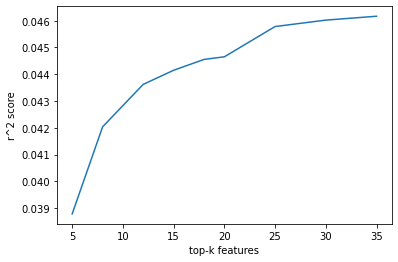

In [322]:
#import sklearn
#sklearn.metrics.SCORERS.keys()

#neg_mean_squared_error

plt.plot(x,y)
plt.xlabel("top-k features")
plt.ylabel("r^2 score")
#plt.xticks(x,x)

<b> Plot for Linear regression top-k features vs R2 score for Distance target varible</b>

In [323]:
from sklearn.metrics import mean_squared_error
final_cols=DF.iloc[0:25,0]
train_final=X_train[final_cols.tolist()]
LR = LinearRegression(normalize=True)
X_test=X_test[final_cols.tolist()]

linreg.fit(train_final,y_train)
ypred=linreg.predict(X_test)



RMSE of the best linear regression model

In [324]:
lr_dist=mean_squared_error(ypred,y_test,squared=False)
print(lr_dist)

1.6334902488415388


Using the preprocessed dataset and using num_boost_round=20 to arrive at ideal max_depth and eta parameters for a Xgboost model

In [119]:
X_train,X_test,y_train,y_test=train_test_split(df1.loc[:,df1.columns!='Distance(mi)'],df1.loc[:,df1.columns=='Distance(mi)'],test_size=0.2,random_state=2)
train=xgboost.DMatrix(X_train,label=y_train)
test=xgboost.DMatrix(X_test,label=y_test)
max_depth=[13,15,16,17]
eta=[0.7,0.8,0.6]
P={}
best=-10000
for i in max_depth:
    for j in eta:
        param={'max_depth':i,'eta':j,'objective':'reg:squarederror'}
        bt=xgboost.train(param,train,20)
        pred=bt.predict(test)
        #print("HERE")
        if(r2_score(y_test,pred)>best):
            best=r2_score(y_test,pred)
            P=param

In [120]:
P

{'max_depth': 15, 'eta': 0.7, 'objective': 'reg:squarederror'}

fine-tuning the top k attributes for a Xgboost regression model by using the ideal max_depth and and eta paramter from previos step

In [325]:
from sklearn.model_selection import cross_val_score
possible_cols=[5,8,12,15,18,20,25,30,35]
x=[]
y=[]
X_train,X_test,y_train,y_test=train_test_split(df1.loc[:,df1.columns!='Distance(mi)'],df1.loc[:,df1.columns=='Distance(mi)'],test_size=0.2,random_state=2)
for k in possible_cols:
    final_cols=DF.iloc[0:k,0]
    train_final=X_train[final_cols.tolist()]
    train=xgboost.DMatrix(train_final,label=y_train)
    #test=xgboost.DMatrix(X_test,label=y_test)
    #param={'max_depth':15,'eta':0.7,'objective':'reg:squarederror'}
    #bt=xgboost.train(param,train,20)
    #pred=bt.predict(test)
    #r2_score(y_test,pred)
    param={'max_depth':15,'eta':0.7,'objective':'reg:squarederror'}
    cvxg=cv(dtrain=train,params=param,nfold=5,num_boost_round=10,metrics="rmse")
    #x.append(cvxg['test-rmse-mean'].mean())
    x.append(k)
    y.append(cvxg['test-rmse-mean'].mean())
    print(k)


5
8
12
15
18
20
25
30
35


Text(0, 0.5, 'root mean squared error')

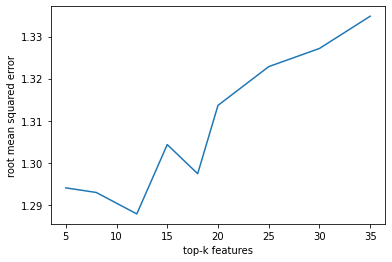

In [326]:
plt.plot(x,y)
plt.xlabel("top-k features")
plt.ylabel("root mean squared error")

<b>Plot for Xgboost top-k features vs RMSE for Distance(mi) target variable</b>

In [327]:
#final_cols=DF.iloc[0:5,0]
#train_final=df1[final_cols.tolist()]
#X_train,X_test,y_train,y_test=train_test_split(train_final,df1.iloc[:,5],test_size=0.2,random_state=2)
#train=xgboost.DMatrix(X_train,label=y_train)
#test=xgboost.DMatrix(X_test,label=y_test)
#param={'max_depth':15,'eta':0.7,'objective':'reg:squarederror'}
#bt=xgboost.train(param,train,80)
#pred=bt.predict(test)
#r2_score(y_test,pred)
#cvxg=cv(dtrain=train,params=param,nfold=5,num_boost_round=10,metrics="rmse")
#x.append(cvxg['test-rmse-mean'].mean())
#y.append()

In [328]:
#r2_score(y_test,pred),mean_squared_error(pred,y_test)

In [329]:
#r2_score(y_test,pred),mean_squared_error(pred,y_test)

Using the ideal k value from the last plot, selecting the appropriate number of trees for the Xgboost

In [330]:
num_iter=[20,40,60,80,100,120]
x=[]
y=[]
error=[]
final_cols=DF.iloc[0:5,0]
train_final=df1[final_cols.tolist()]
X_train,X_test,y_train,y_test=train_test_split(train_final,df1.iloc[:,5],test_size=0.2,random_state=2)
train=xgboost.DMatrix(X_train,label=y_train)
test=xgboost.DMatrix(X_test,label=y_test)
param={'max_depth':15,'eta':0.7,'objective':'reg:squarederror'}
for i in num_iter:
    bt=xgboost.train(param,train,i)
    pred=bt.predict(test)
    x.append(i)
    y.append(r2_score(y_test,pred))
    error.append(mean_squared_error(pred,y_test,squared=False))
    
    print(i)

20
40
60
80
100
120


Text(0, 0.5, 'r2 score')

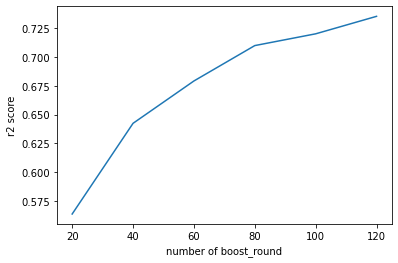

In [331]:
plt.plot(x,y)
plt.xlabel("number of boost_round")
plt.ylabel("r2 score")

<b>Plot for Xgboost num_boost_round vs R^2 for Distance(mi) target variable</b>

Text(0, 0.5, 'root mean squared error')

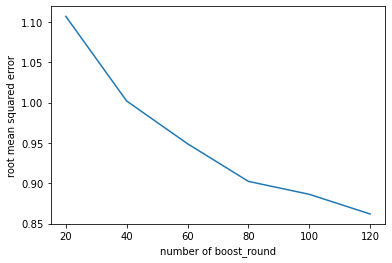

In [332]:
plt.plot(x,error)
plt.xlabel("number of boost_round")
plt.ylabel("root mean squared error")

<b>Plot for Xgboost num_boost_round vs RMSE for Distance(mi) target variable</b>

RMSE of the best Xgboost regression model

In [333]:
xg_dist=error[-3]
print(xg_dist)

0.9023941729544065


<b>Predicting severity the same way as did above, first by getting insight about which attributes are useful to predict severity and then applying linear regression and Xgboost<b>

In [334]:
x2=best.fit(df1.loc[:,df1.columns!='Severity'],df1['Severity'])
#print(best.transform(df.iloc[:,0:7]))
scores_df=pd.DataFrame(x2.scores_)
col=pd.DataFrame(df1.loc[:,df1.columns!='Severity'].columns)
DF1=pd.concat([col,scores_df],axis=1)


In [335]:
DF1.columns=['Attribute','Score']
DF1=DF1.sort_values('Score',ascending=False)

In [336]:
DF1

,Attribute,Score
3,End_Lng,50471.042056
1,Start_Lng,50469.286796
4,Distance(mi),36276.656740
12,start_month,24902.229501
14,end_month,24816.227524
2,End_Lat,9455.594024
0,Start_Lat,9453.988254
6,Wind_Chill(F),7478.358947
10,Wind_Speed(mph),5394.534362
8,Pressure(in),4587.063242


In [337]:
from sklearn.model_selection import cross_val_score
possible_cols=[5,8,12,15,18,20,25,30,35]
x=[]
y=[]
X_train,X_test,y_train,y_test=train_test_split(df1.loc[:,df1.columns!='Severity'],df1.loc[:,df1.columns=='Severity'],test_size=0.2,random_state=2)
for k in possible_cols:
    final_cols=DF1.iloc[0:k,0]
    train_final=X_train[final_cols.tolist()]
    linreg = LinearRegression(normalize=True)
    score=cross_val_score(linreg,train_final,y_train,cv=10,scoring='r2')
    #x.append(cvxg['test-rmse-mean'].mean())
    x.append(k)
    y.append(score.mean())
    print(k)

5
8
12
15
18
20
25
30
35


Text(0, 0.5, 'r2 score')

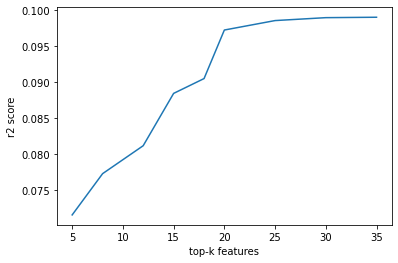

In [338]:
plt.plot(x,y)
plt.xlabel("top-k features")
plt.ylabel("r2 score")

<b>Plot for Linear regression top-k features vs R2 score for Severity target variable</b>

In [339]:
final_cols=DF1.iloc[0:25,0]
train_final=X_train[final_cols.tolist()]
LR = LinearRegression(normalize=True)
X_test=X_test[final_cols.tolist()]

linreg.fit(train_final,y_train)
ypred=linreg.predict(X_test)


The best linear regression model for severity

In [340]:
lr_sev=mean_squared_error(ypred,y_test,squared=False)
print(lr_sev)

0.579452143925054


Using the preprocessed dataset and num_boost_round=20 to arrive at ideal max_depth and eta parameters

In [100]:
X_train,X_test,y_train,y_test=train_test_split(df1.loc[:,df1.columns!='Severity'],df1.loc[:,df1.columns=='Severity'],test_size=0.2,random_state=2)
train=xgboost.DMatrix(X_train,label=y_train)
test=xgboost.DMatrix(X_test,label=y_test)
max_depth=[13,15,16,17,18]
eta=[0.5,0.7,0.8,0.6]
P={}
best=-10000
for i in max_depth:
    for j in eta:
        param={'max_depth':i,'eta':j,'objective':'reg:squarederror'}
        bt=xgboost.train(param,train,20)
        pred=bt.predict(test)
        #print("HERE")
        if(r2_score(y_test,pred)>best):
            best=r2_score(y_test,pred)
            P=param
 


In [101]:
best

0.4447037765602998

In [102]:
P

{'max_depth': 18, 'eta': 0.5, 'objective': 'reg:squarederror'}

In [111]:
P={'max_depth': 18, 'eta': 0.5, 'objective': 'reg:squarederror'}

fine tuning the Xgboost model for top-k attributes. The model used the ideal values for max_depth and eta from previous steps

In [341]:
from sklearn.model_selection import cross_val_score
possible_cols=[10,15,18,20,23,25,27,30,32,35]
x=[]
y=[]
X_train,X_test,y_train,y_test=train_test_split(df1.loc[:,df1.columns!='Severity'],df1.loc[:,df1.columns=='Severity'],test_size=0.2,random_state=2)
for k in possible_cols:
    final_cols=DF1.iloc[0:k,0]
    train_final=X_train[final_cols.tolist()]
    train=xgboost.DMatrix(train_final,label=y_train)
    #test=xgboost.DMatrix(X_test,label=y_test)
    #param={'max_depth':15,'eta':0.7,'objective':'reg:squarederror'}
    #bt=xgboost.train(param,train,20)
    #pred=bt.predict(test)
    #r2_score(y_test,pred)
    #param={'max_depth':15,'eta':0.7,'objective':'reg:squarederror'}
    cvxg=cv(dtrain=train,params=P,nfold=5,num_boost_round=10,metrics="rmse")
    #x.append(cvxg['test-rmse-mean'].mean())
    x.append(k)
    y.append(cvxg['test-rmse-mean'].mean())
    print(k)


10
15
18
20
23
25
27
30
32
35


Text(0, 0.5, 'root mean squared error')

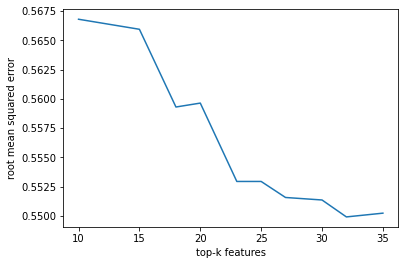

In [104]:
plt.plot(x,y)
plt.xlabel("top-k features")
plt.ylabel("root mean squared error")

<b>Plot for Xgboost regression top-k features vs RMSE  for Severity target variable</b>

In [405]:
y

[0.5977342400000001,
 0.56879368,
 0.56716968,
 0.56593472,
 0.55930336,
 0.5596376999999999,
 0.5529517599999999,
 0.551371,
 0.5502472]

In [112]:
num_iter=[20,40,60,80,100,120]
x=[]
y=[]
err=[]
final_cols=DF1.iloc[0:23,0]
train_final=df1[final_cols.tolist()]
X_train,X_test,y_train,y_test=train_test_split(train_final,df1.loc[:,df1.columns=='Severity'],test_size=0.2,random_state=2)
train=xgboost.DMatrix(X_train,label=y_train)
test=xgboost.DMatrix(X_test,label=y_test)
#param=P
for i in num_iter:
    bt=xgboost.train(P,train,i)
    pred=bt.predict(test)
    x.append(i)
    y.append(r2_score(y_test,pred))
    err.append(mean_squared_error(y_test,pred,squared=False))
    print(i)

20
40
60
80
100
120


Text(0, 0.5, 'r2 score')

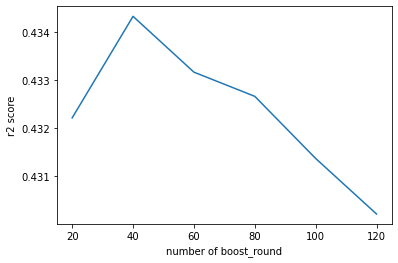

In [113]:
plt.plot(x,y)
plt.xlabel("number of boost_round")
plt.ylabel("r2 score")

<b>Plot for Xgboost num_boost_round vs R^2 for Severity target variable</b>

Text(0, 0.5, 'root mean squared error')

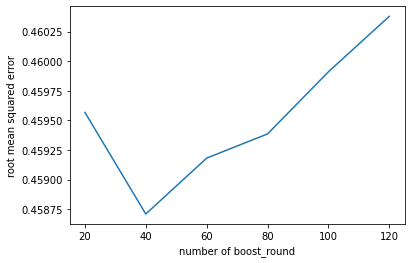

In [114]:
plt.plot(x,err)
plt.xlabel("number of boost_round")
plt.ylabel("root mean squared error")

<b>Plot for Xgboost num_boost_round vs RMSE for Severity target variable</b>

The Xgboost model with the best RMSE:

In [212]:
xg_sev=err[1]
print(xg_sev)

0.4587096785375308


In [342]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516064 entries, 0 to 1516063
Data columns (total 38 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Severity               1516064 non-null  int64  
 1   Start_Lat              1516064 non-null  float64
 2   Start_Lng              1516064 non-null  float64
 3   End_Lat                1516064 non-null  float64
 4   End_Lng                1516064 non-null  float64
 5   Distance(mi)           1516064 non-null  float64
 6   Temperature(F)         1516064 non-null  float64
 7   Wind_Chill(F)          1516064 non-null  float64
 8   Humidity(%)            1516064 non-null  float64
 9   Pressure(in)           1516064 non-null  float64
 10  Visibility(mi)         1516064 non-null  float64
 11  Wind_Speed(mph)        1516064 non-null  float64
 12  Precipitation(in)      1516064 non-null  float64
 13  start_month            1516064 non-null  int64  
 14  start_day         